# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | holualoa
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | howard springs
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | manavalakurichi
Processing Record 8 of Set 1 | tabou
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | yeed
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | saint-pierre
Processing Record 16 of Set 1 | gadzhiyevo
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | simpang
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | avarua
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,274.40,100,75,1.03,CL,1717694499
1,iqaluit,63.7506,-68.5145,276.00,93,75,2.06,CA,1717694362
2,holualoa,19.6228,-155.9522,299.74,86,40,0.00,US,1717694257
3,tiksi,71.6872,128.8694,278.31,78,60,1.18,RU,1717694500
4,howard springs,-12.4970,131.0470,293.10,63,0,4.12,AU,1717694500


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,274.40,100,75,1.03,CL,1717694499
1,iqaluit,63.7506,-68.5145,276.00,93,75,2.06,CA,1717694362
2,holualoa,19.6228,-155.9522,299.74,86,40,0.00,US,1717694257
3,tiksi,71.6872,128.8694,278.31,78,60,1.18,RU,1717694500
4,howard springs,-12.4970,131.0470,293.10,63,0,4.12,AU,1717694500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

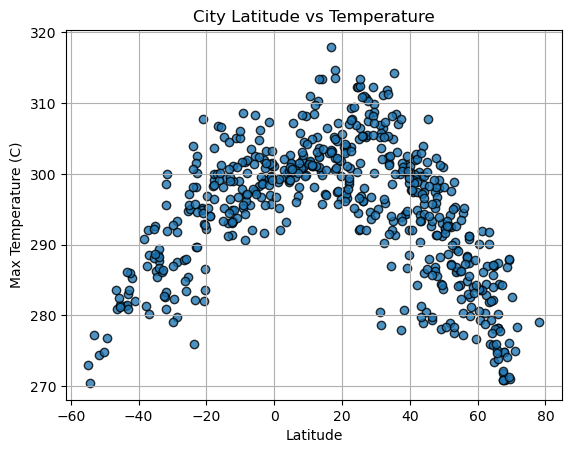

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.80)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Temperature")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

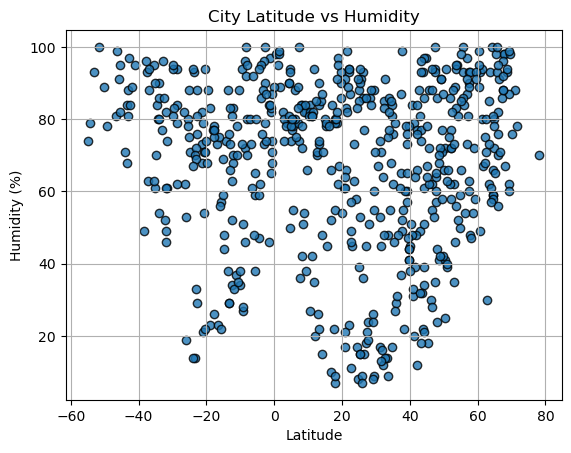

In [10]:
# Build the scatter plots for latitude vs. humidity
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.80)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

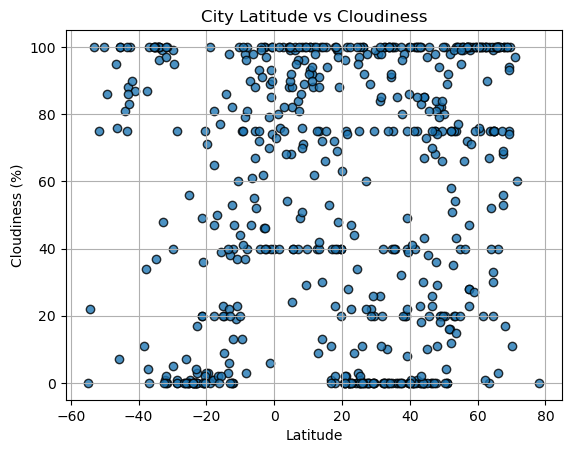

In [11]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.80)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

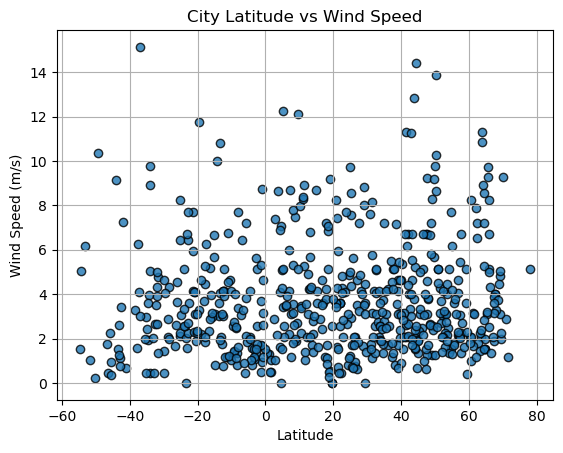

In [12]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolors='black', alpha=0.80)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return print(f"The R-value is {rvalue**2}"),plt.scatter(x_values,y_values),plt.plot(x_values,regress_values,"r-"),plt.annotate(line_eq,(max(x_values),max(y_values)),fontsize=10,color="red")

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0 ,]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,276.00,93,75,2.06,CA,1717694362
2,holualoa,19.6228,-155.9522,299.74,86,40,0.00,US,1717694257
3,tiksi,71.6872,128.8694,278.31,78,60,1.18,RU,1717694500
6,manavalakurichi,8.1333,77.3000,300.54,84,76,3.55,IN,1717694501
7,tabou,4.4230,-7.3528,298.85,90,88,4.09,CI,1717694501


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0 ,]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,274.40,100,75,1.03,CL,1717694499
4,howard springs,-12.4970,131.0470,293.10,63,0,4.12,AU,1717694500
5,grytviken,-54.2811,-36.5092,270.47,79,22,5.05,GS,1717694500
8,waitangi,-43.9535,-176.5597,281.38,71,81,9.14,NZ,1717694502
9,afaahiti,-17.7500,-149.2833,299.08,77,81,1.85,PF,1717694502


###  Temperature vs. Latitude Linear Regression Plot

The R-value is 0.5283632794679748


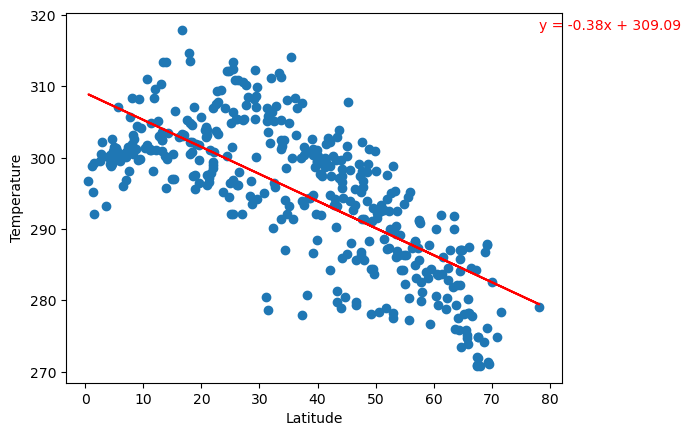

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The R-value is 0.6105198581314553


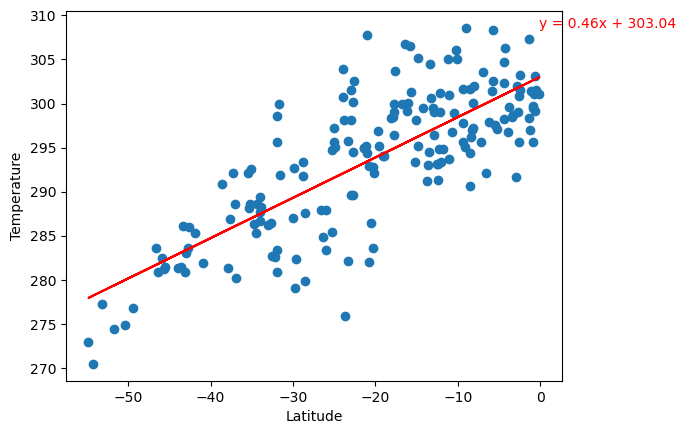

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** There is a Negative relationship between temperature and latitude in the northern hemisphere. the temperature drops consistently with the increase in latitude. 
On the other hand, the southern hemisphere has an equally strong relationship between temperature and latitude. The temperature increases consistently with the rise in latitude. The relationship in the southern hemisphere is stronger than northern as the R value is higher. 

### Humidity vs. Latitude Linear Regression Plot

The R-value is 0.009787411793815225


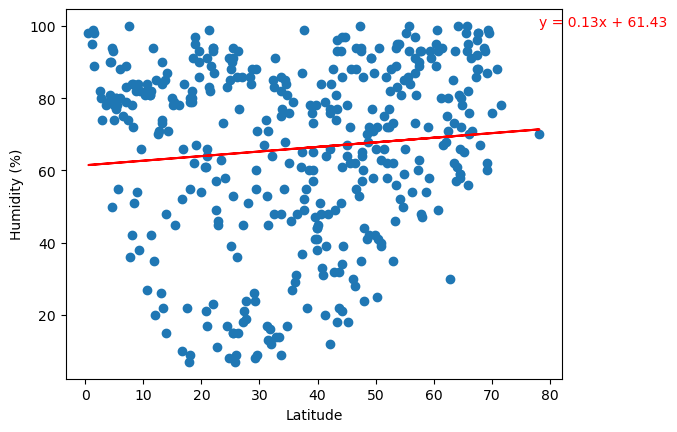

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The R-value is 0.03437980006612883


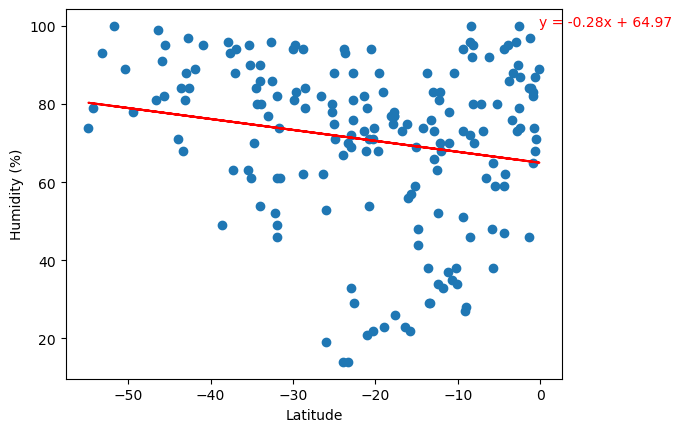

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** The relationship between humidity and Latitude is minimal as suggested by the slope of the line. In the southern hemisphere it is negative as an in increase in latitude leads to a decrease in humidity but that is not very consistent as the relationship is not strong. 
On the other hand, in the northern hemisphere there does not seem to linear relationship as seen with the horizontal line and very low R value. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-value is 0.0013225596833747848


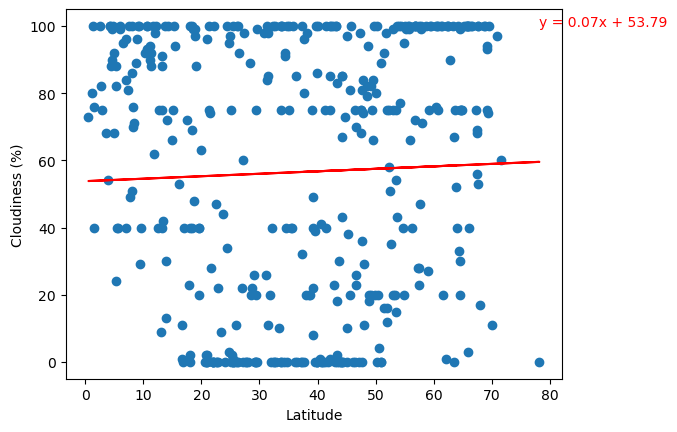

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The R-value is 0.0004421067527466121


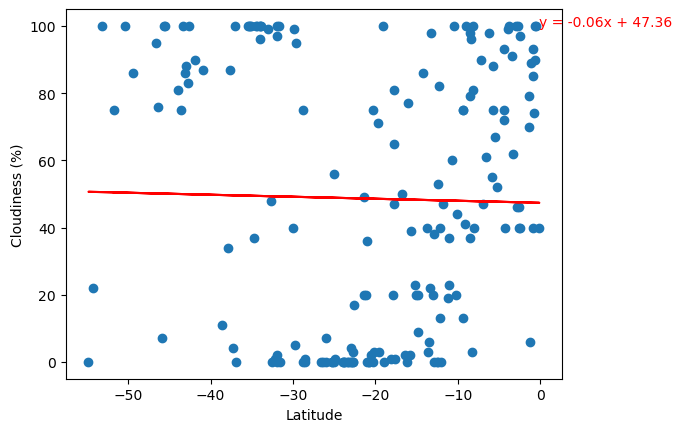

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**The R value and horizontal line indicate that Cloudiness and Latitude have no relationship in neither hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The R-value is 0.0011277520114846328


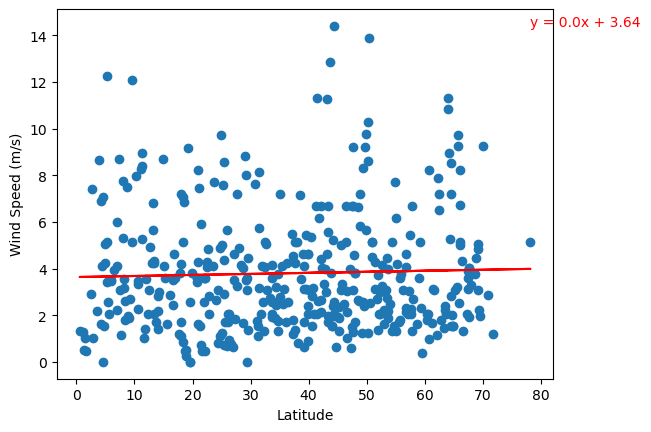

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The R-value is 0.005139872055651748


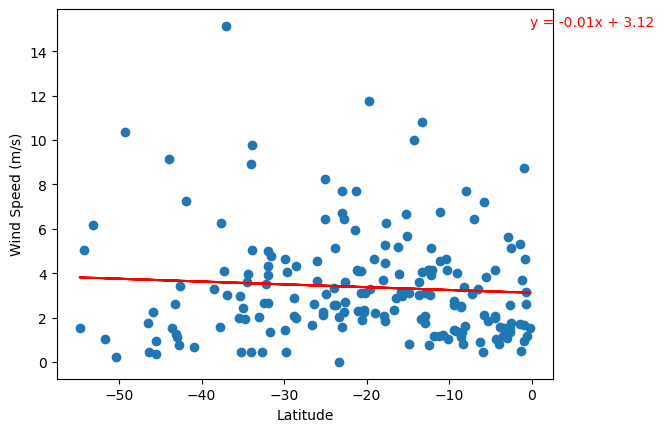

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** The R value and horizontal line indicate that Wind speed and Latitude have no relationship in neither hemispheres. 